### Customer Churn: How many customers are leaving the company service to identify reason to leave

Churn==Yes shows the customer will leave the company

### 1. Important Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Data Read (Download from Kaggle)

In [2]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4231,7998-WNZEM,Male,0,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),80.60,5708.2,No
2007,8086-OVPWV,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.20,181.1,Yes
1365,7721-JXEAW,Male,0,Yes,No,59,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),41.05,2452.7,Yes
3515,5206-HPJKM,Male,0,No,No,17,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,934.15,No
979,6461-PPAXN,Female,0,Yes,Yes,35,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),54.95,1916,No


### 3. Data Exploration and Filtering

- Dropping customer Id column

In [3]:
df.drop('customerID', axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Total Charges (has string data) convert to numeric float type like MonthyCharges 

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

coerce replaces empty values with null values and is null returns true if value is null

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

11 rows data needs to be removed with null totalcharges value

In [10]:
df_new=df[df.TotalCharges!=' ']
df_new.shape

(7032, 20)

In [11]:
df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)

C:\Users\USER\AppData\Local\Temp\ipykernel_11312\730428111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)


In [12]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Histogram visualization of affect of Tenure on Churn

Text(0, 0.5, 'Number of customers')

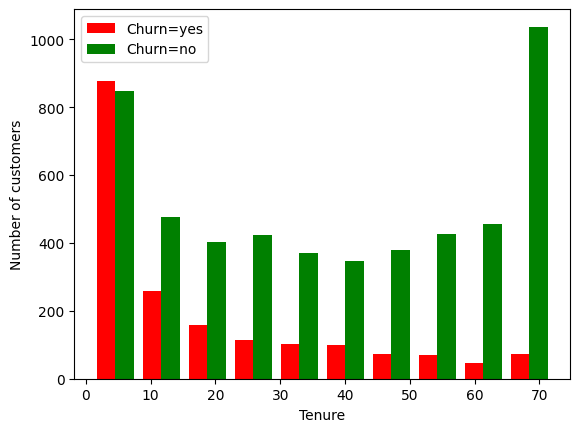

In [13]:
tenure_churn_no=df_new[df_new.Churn=='No'].tenure
tenure_churn_yes=df_new[df_new.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no], color=['red','green'],label=['Churn=yes', 'Churn=no'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')

Less Customers are leaving with increasing tenure. 

### Current model considers all the factors into account for predicting Churn

- Label Encoding: Yes 1 No 0, Female 1 Male 0 

In [14]:
def print_unique_col(df_new):
 for column in df_new:
     print(f'{column} : {df_new[column].unique()})')

In [15]:
print_unique_col(df_new)

gender : ['Female' 'Male'])
SeniorCitizen : [0 1])
Partner : ['Yes' 'No'])
Dependents : ['No' 'Yes'])
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39])
PhoneService : ['No' 'Yes'])
MultipleLines : ['No phone service' 'No' 'Yes'])
InternetService : ['DSL' 'Fiber optic' 'No'])
OnlineSecurity : ['No' 'Yes' 'No internet service'])
OnlineBackup : ['Yes' 'No' 'No internet service'])
DeviceProtection : ['No' 'Yes' 'No internet service'])
TechSupport : ['No' 'Yes' 'No internet service'])
StreamingTV : ['No' 'Yes' 'No internet service'])
StreamingMovies : ['No' 'Yes' 'No internet service'])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : ['Yes' 'No'])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
MonthlyCharges : [29.85 56.95 53.85 .

In [16]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)
print_unique_col(df_new)

gender : ['Female' 'Male'])
SeniorCitizen : [0 1])
Partner : ['Yes' 'No'])
Dependents : ['No' 'Yes'])
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39])
PhoneService : ['No' 'Yes'])
MultipleLines : ['No' 'Yes'])
InternetService : ['DSL' 'Fiber optic' 'No'])
OnlineSecurity : ['No' 'Yes'])
OnlineBackup : ['Yes' 'No'])
DeviceProtection : ['No' 'Yes'])
TechSupport : ['No' 'Yes'])
StreamingTV : ['No' 'Yes'])
StreamingMovies : ['No' 'Yes'])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : ['Yes' 'No'])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ])
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ])
Churn : ['No' 'Yes'])


C:\Users\USER\AppData\Local\Temp\ipykernel_11312\3035308048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No internet service','No',inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11312\3035308048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No phone service','No',inplace=True)


In [17]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df_new.replace({'Yes':1,'No':0},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11312\3263725240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Yes':1,'No':0},inplace=True)


In [18]:
print_unique_col(df_new)

gender : ['Female' 'Male'])
SeniorCitizen : [0 1])
Partner : [1 0])
Dependents : [0 1])
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39])
PhoneService : [0 1])
MultipleLines : [0 1])
InternetService : ['DSL' 'Fiber optic' 0])
OnlineSecurity : [0 1])
OnlineBackup : [1 0])
DeviceProtection : [0 1])
TechSupport : [0 1])
StreamingTV : [0 1])
StreamingMovies : [0 1])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : [1 0])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ])
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ])
Churn : [0 1])


In [19]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [20]:
df_new.replace({'Female':1,'Male':0},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11312\1307249774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Female':1,'Male':0},inplace=True)


- One Hot Encoding for 3 features with more than 2 unique data entries

In [21]:
df_new=pd.get_dummies(data=df_new, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df_new


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [22]:
df_new.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int32
InternetService_DSL                          int32
InternetService_Fiber optic    

### 4. Scaling Data

MinMaxScaler converts numeric values in range (0-1) applied for 3 features

In [23]:
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

In [24]:
df_new.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3645,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4596,0,0,0,0,0.239437,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3999,1,1,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5395,1,0,0,0,0.056338,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [25]:
print_unique_col(df_new)

gender : [1 0])
SeniorCitizen : [0 1])
Partner : [1 0])
Dependents : [0 1])
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127])
PhoneService : [0 1])
MultipleLines : [0 1])
OnlineSecurity : [0 1])
OnlineBackup : [1 0])
DeviceProtection : [

## 5. Model fitting and testing

In [26]:
X=df_new.drop('Churn', axis='columns')
y=df_new['Churn']

Model output is binary Churn value 0 or 1

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [28]:
X_train.shape, y_train.shape

((5625, 26), (5625,))

In [29]:
X_test.shape, y_test.shape

((1407, 26), (1407,))

### Model: ANN: Artificial Neural Network uses densely connected layers of several neurons to improve predictions

In [30]:
def ANN(X_train, y_train, X_test, y_test):
    
    ann_model=keras.Sequential([    
    keras.layers.Dense(60, input_dim=26, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    ann_model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

    ann_model.fit(X_train, y_train, epochs=50, validation_split=0.2)
    
    print(ann_model.evaluate(X_test, y_test))
    
    y_preds = ann_model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [31]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/50
141/141 [==============================] - 4s 8ms/step - loss: 0.5604 - accuracy: 0.7336 - val_loss: 0.5224 - val_accuracy: 0.7422
Epoch 2/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4969 - accuracy: 0.7444 - val_loss: 0.4894 - val_accuracy: 0.7520
Epoch 3/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4652 - accuracy: 0.7769 - val_loss: 0.4697 - val_accuracy: 0.7573
Epoch 4/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4468 - accuracy: 0.7933 - val_loss: 0.4585 - val_accuracy: 0.7573
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.7944 - val_loss: 0.4529 - val_accuracy: 0.7680
Epoch 6/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4310 - accuracy: 0.7964 - val_loss: 0.4494 - val_accuracy: 0.7778
Epoch 7/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4269 - accuracy: 0.7962 - val_loss: 0.4472 - val_accuracy: 0.7707
Epoch 

### Model Accuracy: Churn=0: 86% ...... Churn=1: 61% ......Overall: 80%.......................Validation Accuracy 79%

Confusion Matrix to visualize model correct and wrong predictons

Text(20.72222222222222, 0.5, 'Truth')

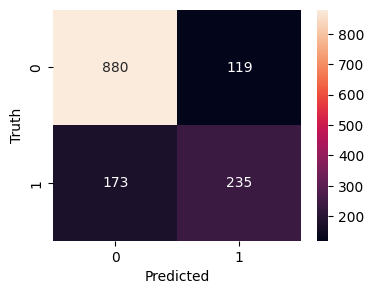

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize = (4,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 6. Handling Imbalanced Dataset to improve accuracy

In [33]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [34]:
y_train.value_counts()

Churn
0    4164
1    1461
Name: count, dtype: int64

In [35]:
# Class count
count_class_0, count_class_1 = df_new.Churn.value_counts()

# Divide by class
df_class0 = df_new[df_new['Churn'] == 0]
df_class1 = df_new[df_new['Churn'] == 1]

In [36]:
df_class0.shape

(5163, 27)

In [37]:
df_class1.shape

(1869, 27)

For Churn=1 (people leaving the company) the dataset and accuracy of model is less which is the main aim of churn prediction

#### Method: SMOTE(Synthetic Minority OverSampling Technique)...... Generate synthetic/artificial examples for Churn=1 similar to existing data

In [38]:
X = df_new.drop('Churn', axis='columns')
y = df_new['Churn']

In [39]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

Created equal data for Churn 0 and 1

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

In [42]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [43]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [44]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/50
207/207 [==============================] - 2s 4ms/step - loss: 0.6160 - accuracy: 0.6942 - val_loss: 0.5577 - val_accuracy: 0.7591
Epoch 2/50
207/207 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.7565 - val_loss: 0.5024 - val_accuracy: 0.7742
Epoch 3/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.7683 - val_loss: 0.4855 - val_accuracy: 0.7797
Epoch 4/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.7715 - val_loss: 0.4802 - val_accuracy: 0.7827
Epoch 5/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.7766 - val_loss: 0.4768 - val_accuracy: 0.7821
Epoch 6/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.7754 - val_loss: 0.4764 - val_accuracy: 0.7772
Epoch 7/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.7778 - val_loss: 0.4727 - val_accuracy: 0.7797
Epoch 

### Original Model Accuracy: Churn=0: 86% ...... Churn=1: 61% ......Overall: 80%.......................Validation Accuracy 79%


### SMOTE Model Accuracy: Churn=0: 80% ...... Churn=1: 82% ......Overall: 81%.......................Validation Accuracy 79%

......................   .............. .......   Results in better model prediction for Churn=1 and equally good for Churn=0          ....... .......... .........................